# Mathematical Statistics Final Project
# Names: Jungmin Lee, Christine Choi

## Introduction
For our project, we wanted to see if there is any correlation between health-related causes of death and factors such as gender and race ethnicity. We thought this topic would be interesting because the results may tell us about how certain demographics need to be more careful with particular diseases and we also thought the data is relevant to us since we are living in NYC as well. We conducted 2 hypothesis tests, 2 confidence intervals, and a linear regression to explore our data.

## Data Sources & Preparation
We used the data on 'New York City's Leading Causes of Death' from the NYC Open Data website (https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam). We first deleted any unspecified values in the race ethnicity category to exclude any null values and make our data more accurate.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
from pandas import DataFrame
from scipy.stats import norm

In [24]:
data = pd.read_csv('causesofdeath.csv')
data.Deaths = pd.to_numeric(data.Deaths, errors='coerce')
data = data.drop(data[data['Race Ethnicity'] == 'Other Race/ Ethnicity'].index)
data = data.drop(data[data['Race Ethnicity'] == 'Not Stated/Unknown'].index)
data['Death Rate'] = pd.to_numeric(data['Death Rate'], errors='coerce')
data['Age Adjusted Death Rate'] = pd.to_numeric(data['Age Adjusted Death Rate'],errors='coerce')
data

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299.0,35.1,35.5
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840.0,215.7,268.3
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64.0,5.1,5.4
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152.0,17.8,18.6
7,2009,All Other Causes,M,Asian and Pacific Islander,220.0,43.1,56.1
8,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,437.0,72.8,81.8
12,2012,Essential Hypertension and Renal Diseases (I10...,F,White Non-Hispanic,199.0,14.0,7.2
15,2014,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,165.0,13.8,20.4
16,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,4220.0,316.4,260.2
17,2014,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,193.0,15.2,16.8


## 1st hypothesis testing and corresponding confidence interval

### Methodology
For our first hypothesis test, we tried to see whether the percentage of deaths caused by diabetes mellitus is approximately the same for males and females. Thus, we set up the null hypothesis as p_d=0.5, which means that 50% of deaths caused by diabetes mellitus is found in males. We assumed normal distribution and used a normal hypothesis testing with an alpha value of 0.05 and corresponding z-score of 1.96. To find out the p_d value, we divided the number of deaths caused by diabetes mellitus for males by the total number of deaths caused by diabetes mellitus.

In [25]:
#data on diabetes mellitus
diabetes = data.loc[data['Leading Cause'] == "Diabetes Mellitus (E10-E14)"]
diabetes['Deaths'].value_counts()
diabetesN = diabetes.Deaths.sum()

male_diabetes = diabetes.loc[diabetes['Sex']=='M']
md=male_diabetes.Deaths.sum()

In [26]:
# H0: p_d = 0.5 vs. H1: p_d ≠ 0.5

alpha = 0.05
hat_mdp = md / diabetesN
hat_varmdp = hat_mdp*(1-hat_mdp) / diabetesN
hat_semdp = np.sqrt(hat_varmdp)
W = (hat_mdp-0.5) / hat_semdp
z = norm.ppf(1-alpha/2)
pval = 2*norm.cdf(-np.abs(W))

#Result
print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))
print("The p-value is {}".format(pval))

if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("We failed to reject the null hypothesis at size {}.".format(alpha))

# 95% normal confidence interval for the corresponding hypothesis test
CI = (hat_mdp - 1.96*hat_semdp, hat_mdp + 1.96*hat_semdp)
print('The 95% Confidence Interval is {}'.format(CI))

The test statistic: 5.7770885653475625, The critical value: 1.959963984540054
The p-value is 7.600428410029344e-09
The null hypothesis is rejected at size 0.05.
The 95% Confidence Interval is (0.46682430429277444, 0.48363278801038101)


### Results
We rejected the null hypothesis, meaning that there is sufficient evidence that the percentage of deaths caused by diabetes mellitus is not the same for males and females.

Through further research, we found out that males are more likely to develop type 2 diabetes; according to the American Diabetes Association, men may be less sensitive to insulin than women, which may account for the higher percentage of deaths caused by diabetes for males. This is actually consistent with what we observe in our dataset, because we see that the number of deaths caused by diabetes is higher for males than females. Thus, the result from our hypothesis testing seems to be reasonable and it aligns with what we expected.

## 2nd hypothesis testing and corresponding confidence interval

### Methodology
For our second hypothesis test, we wanted to see if  the percentage of deaths caused by diesease of heart is approximately the same for males and females. Similar to the first test, we set up the null hypothesis as p_h=0.5, which means that 50% of deaths caused by heart disease is found in males. We assumed normal distribution again and used a normal hypothesis testing with an alpha value of 0.05 and corresponding z-score of 1.96. To find out the p_h value, we divided the number of deaths caused by heart diseases for males by the total number of deaths caused by heart diseases.

In [27]:
#data on heart disease
heartdisease = data.loc[data['Leading Cause'] == "Diseases of Heart (I00-I09, I11, I13, I20-I51)"]
heartdisease['Deaths'].value_counts()
hdN = heartdisease.Deaths.sum()

male_hd = heartdisease.loc[heartdisease['Sex']=='M']
mhd=male_hd.Deaths.sum()

In [28]:
# H0: p_h = 0.5 vs. H1: p_h ≠ 0.5

alpha = 0.05
hat_mhdp = mhd / hdN
hat_varhdp = hat_mhdp*(1-hat_mhdp) / hdN
hat_semhdp = np.sqrt(hat_varhdp)
W = (hat_mhdp-0.5) / hat_semhdp
z = norm.ppf(1-alpha/2)
pval = 2*norm.cdf(-np.abs(W))

#Result
print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))
print("The p-value is {}".format(pval))

if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("We failed to reject the null hypothesis at size {}.".format(alpha))

# 95% normal confidence interval for the corresponding hypothesis test
CI = (hat_mhdp - 1.96*hat_semhdp, hat_mhdp + 1.96*hat_semhdp)
print('The 95% Confidence Interval is {}'.format(CI))

The test statistic: 26.439521426689705, The critical value: 1.959963984540054
The p-value is 4.815697919342121e-154
The null hypothesis is rejected at size 0.05.
The 95% Confidence Interval is (0.462844277288117, 0.46797290008574272)


### Results
We rejected the null hypothesis, meaning that there is sufficient evidence that the percentage of deaths caused by diseases of heart is not the same for males and females.

As we conducted further research, we found out that women have higher risks of developing heart diseases. This can also be observed in our dataset, which shows that the number of deaths caused by heart diseases is higher for females than males. Thus, we can conclude that the result from our hypothesis testing makes sense.

However, we do not want to make any biased assumptions based on gender for both hypothesis tests. Our results are only based on a specific dataset provided by NYC, and thus they may not necessarily be consistent with other datasets.

## Linear Regression

While we want to avoid any racist assumptions about certain causes of death and also acknowledge that races are not equally distributed in New York City, medical researches have shown that certain fatal diseases appear more frequently in some races. For example, according to the American Diabetes Association, Type-2 diabetes is more likely to appear in African Americans, Hispanic Americans and Pacific Islanders, likely because of cultural differences in diet that affect cholesterol and blood pressure levels. This can be observed in our dataset as well; the death rates for diabetic women of all races represented in the scatterplot below are noticeably divided into three levels, with the highest corresponding to the Black Non-Hispanic and the second corresponding to the Hispanic group.

In [29]:
diabetes = data.loc[data['Leading Cause'] == "Diabetes Mellitus (E10-E14)"]
fem_diabetes = diabetes.loc[diabetes['Sex']=='F']
fem_diabetes_h = fem_diabetes.loc[fem_diabetes['Race Ethnicity']=='Hispanic']

(array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 8 Text yticklabel objects>)

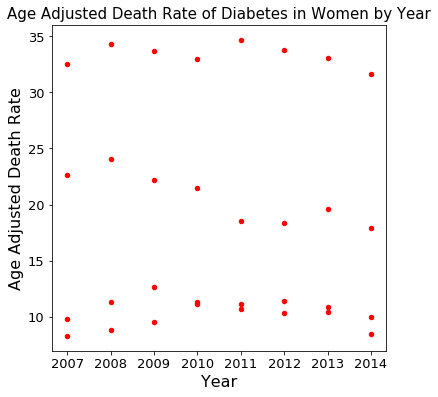

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(fem_diabetes.Year, fem_diabetes['Age Adjusted Death Rate'], s=20, c='red')
plt.plot()

plt.title('Age Adjusted Death Rate of Diabetes in Women by Year', fontsize = 15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Age Adjusted Death Rate', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

### Methodology

For our analysis, we examine the trend in age adjusted death rates for diabetes in Hispanic women. We narrowed down our dataset to compare how the rates have changed over the last few years, setting Y (the dependent variable) as the Age Adjusted Death Rate and X values as the years.

In [31]:
y = fem_diabetes_h['Age Adjusted Death Rate']
X = fem_diabetes_h.Year

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Age Adjusted Death Rate   R-squared:                       0.780
Model:                                 OLS   Adj. R-squared:                  0.744
Method:                      Least Squares   F-statistic:                     21.32
Date:                     Mon, 07 May 2018   Prob (F-statistic):            0.00362
Time:                             22:24:14   Log-Likelihood:                -11.431
No. Observations:                        8   AIC:                             26.86
Df Residuals:                            6   BIC:                             27.02
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1691.2298    361.779      4.675      0.003     805.990    2576.470
Year          -0.8310      0.180     -4.618      0.004      -1.271      -0.391
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   2.499
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.558
Skew:                          -0.255   Prob(JB):                        0.757
Kurtosis:                       1.811   Cond. No.                     1.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results
Model coefficients: The model fitted in this case is the line $ \widehat{\mathrm{Age Adjusted Death Rate}} = 1691.2298 + (-0.8310)\widehat{\mathrm{Year}} $


This suggests that the age-adjusted death rate for female Hispanic diabetes patients decreased by .83 on average each year. Since the x-variable is the Year, the intercept does not provide much contextual meaning.
The dataset we used does not specify other details about factors that affect these death rates of different population groups, this decline was not surprising since we expect overall living conditions and access/credibility of medical assistance to improve over time.

The slope coefficient was estimated with a p-value of 0.004 which is reasonably low, so we can conclude that death rates have indeed decreased over the years. The R-squared value shows that a little less than 80% of the variance of the death rates have been captured by linear regression, but we would expect this to improve with a dataset that covers a longer time period.

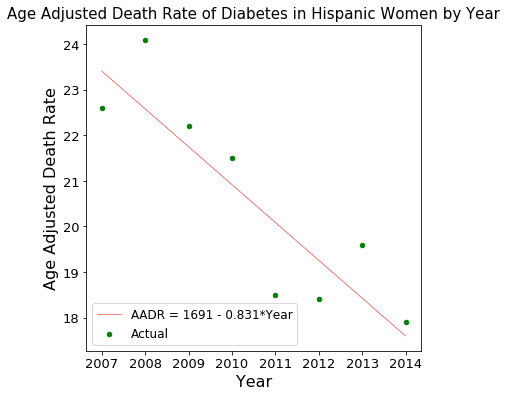

In [32]:
xVals = np.linspace(2007, 2014, 100) 
yVals = 1691.2298-(0.8310)*xVals

plt.figure(figsize=(6,6))
plt.scatter(fem_diabetes_h.Year, fem_diabetes_h['Age Adjusted Death Rate'], s=20, c='green', label='Actual')
plt.plot(xVals, yVals, 'r-', lw=0.5, label='AADR = 1691 - 0.831*Year')
plt.plot()

plt.title('Age Adjusted Death Rate of Diabetes in Hispanic Women by Year', fontsize = 15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Age Adjusted Death Rate', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left', fontsize = 12);

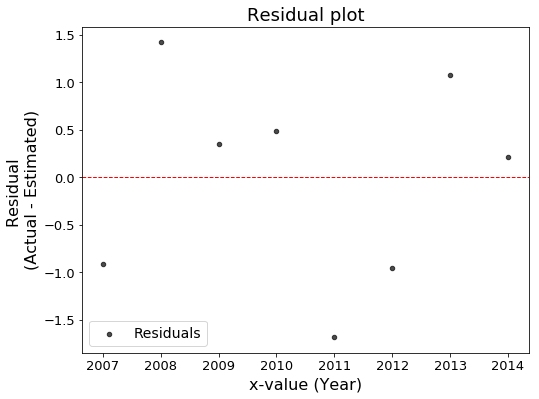

In [33]:
xResid = fem_diabetes_h.Year

plt.figure(figsize=(8,6))
plt.scatter(xResid, results.resid, c='black', s=20, alpha=0.7, label='Residuals')
plt.axhline(y=0, ls='--', c='r', lw=1)
plt.legend(fontsize=14)
plt.title('Residual plot', fontsize = 18)
plt.xlabel('x-value (Year)', fontsize = 16)
plt.ylabel('Residual \n(Actual - Estimated)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left', fontsize = 14);

## Future directions
The data is primarily capturing the leading causes of death for various gender and racial groups rather than analyzing individual cases of deaths. We did not have enough information to consider other variables such as age, socio-economic status and living conditions of the individuals included in the sample, and various environmental factors that possibly affect survival rates from several causes of death. Also, NYC may have different demographics from other regions in the U.S., which may have affected our conclusions. 